Classifier Accuracy: 53.0%


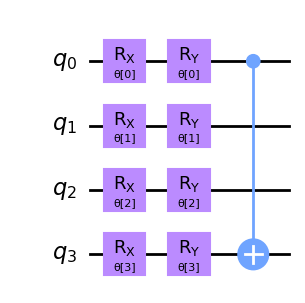

In [244]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from qiskit import Aer
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.algorithms.optimizers import COBYLA
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier

train_data = pd.read_csv('challenge_train.csv')
test_data = pd.read_csv('challenge_test.csv')
X_train = train_data[['F1', 'F2', 'F3', 'F4']].values
y_train = train_data['Target'].values
X_test = test_data[['F1', 'F2', 'F3', 'F4']].values
y_test = test_data['Target'].values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
num_qubits = 4
num_ansatz = 2
qc = QuantumCircuit(num_qubits)
sampler = Sampler()
params = ParameterVector('θ', length=num_qubits)
ansatz = QuantumCircuit(num_ansatz)

for i in range(num_qubits):
    qc.rx(params[i], i)
    qc.ry(params[i], i)

sampler_qnn = SamplerQNN(
    circuit=qc,
    input_params=params,
    weight_params=ansatz.parameters,
    sampler=sampler,
)
optimizer = COBYLA()
classifier = NeuralNetworkClassifier(
    neural_network=sampler_qnn,
    optimizer=optimizer,
)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(f'Classifier Accuracy: {score*100}%')
qc.draw(output='mpl')